# Statistics

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [57]:
sales = np.array([[3505, 2400, 3027, 2798, 3700, 3250, 2689]])

# def calculating mean_variance(np.array(data)):

def calculate_mean_variance_std(data):

# to makes sure its an array
  data = np.array(data)  
# sample mean
  x_bar = (data.sum()) / data.shape[1]
# sample size 
  n = data.shape[1]
# deviation
  deviation = data - x_bar

  numerator = ((deviation)**2).sum()
# formula for variance
  sample_v = numerator / (n-1)
# std is sqrt of v
  sample_std = np.sqrt(sample_v)

  print(f'Mean: {x_bar}\nVariance: {sample_v}\nStandard Deviation: {sample_std}')


calculate_mean_variance_std(sales)  

Mean: 3052.714285714286
Variance: 214387.90476190473
Standard Deviation: 463.0204150595357


In [41]:
# making sure of mean 
x_bar = sales.mean()
x_bar

3052.714285714286

In [42]:
#making sure of variance
v_sample = np.var(sales, ddof=1)
v_sample

214387.90476190473

In [44]:
# making sure of std
std_sample = np.std(sales, ddof=1)
std_sample

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [84]:
customers = np.array([[127, 80, 105, 92, 120, 115, 93]])

cov = np.cov(sales, customers)
cov

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [78]:
def calculate_corr_coeff(X,Y):

# making sure X, Y are arrays
  X = np.array(X)
  Y = np.array(Y)
# Finding Covariance
  numerator = np.cov(X,Y)[0][1]
# Finding std of X and Y 
  std_X = np.std(X, ddof=1)
  std_Y = np.std(Y, ddof=1)
# Denominator 
  denominator = std_X * std_Y
# formula for r 
  r = numerator / denominator 

  print(f'Standard Deviation of Sales: {std_X}\nStandard Deviation of Customers: {std_Y}\nCorrelation Coefficient: \n{r}')


calculate_corr_coeff(sales,customers)

Standard Deviation of Sales: 463.0204150595357
Standard Deviation of Customers: 17.057326313123664
Correlation Coefficient: 
0.9628339778148909


In [82]:
df = pd.DataFrame({'sales': [3505, 2400, 3027, 2798, 3700, 3250, 2689], 'customers': [127, 80, 105, 92, 120, 115, 93]})
df.head()

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [83]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [97]:
# looking for NaN values 
df.isna().sum().sort_values(ascending=False)

body                1189
cabin               1015
boat                 824
home.dest            565
fare                   2
ticket                 1
parch                  1
sibsp                  1
sex                    1
name                   1
survived               1
pclass                 1
has_cabin_number       0
embarked               0
age                    0
Unnamed: 0             0
dtype: int64

In [98]:
# filling NaN values for 'fare', 'sex', 'survived', 'pclass'
df[['fare', 'sex', 'survived', 'pclass']] = df[['fare', 'sex', 'survived', 'pclass']].fillna(method='ffill')

In [99]:
df[['fare', 'sex', 'survived', 'pclass']].isna().sum().sort_values(ascending=False)

pclass      0
survived    0
sex         0
fare        0
dtype: int64

In [100]:
# change sex to numerical data. female = 0 and male =1
df['sex'] = df['sex'].map({'female':0, 'male':1})
df['sex']

0       0
1       1
2       0
3       1
4       0
       ..
1305    0
1306    1
1307    1
1308    1
1309    1
Name: sex, Length: 1310, dtype: int64

In [102]:
df[['fare', 'sex', 'survived', 'pclass']].cov()

,fare,sex,survived,pclass
fare,2675.845648,-4.607061,6.151406,-24.218042
sex,-4.607061,0.229360,-0.123100,0.050165
survived,6.151406,-0.123100,0.236181,-0.127357
pclass,-24.218042,0.050165,-0.127357,0.701812


In [103]:
df[['fare', 'sex', 'survived', 'pclass']].corr()

,fare,sex,survived,pclass
fare,1.000000,-0.185967,0.244693,-0.558853
sex,-0.185967,1.000000,-0.528903,0.125034
survived,0.244693,-0.528903,1.000000,-0.312816
pclass,-0.558853,0.125034,-0.312816,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

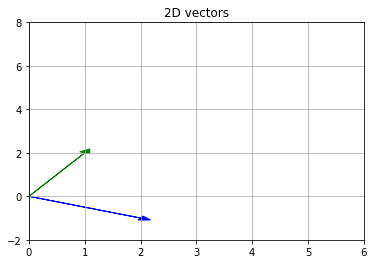

In [107]:
a = np.array([1, 2])
b = np.array([2, -1])

plt.arrow(0,0,a[0], a[1], head_width=.2, head_length=0.2, color = 'g')
plt.arrow(0,0,b[0], b[1], head_width=.2, head_length=0.2, color = 'b')
plt.xlim(0,6)
plt.ylim(-2,8)
plt.grid(True)
plt.title('2D vectors')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [104]:
# These are not orthogonal as their dot product is not 0
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

a_dot_b = np.dot(a,b)
a_dot_b

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [116]:
c = np.array([2, -15, 6, 20])

c_norm_sq = (np.linalg.norm(c))**2
c_norm_sq

665.0

In [110]:
c_dot_c = np.dot(c,c)
c_dot_c 

665

In [115]:
ct_c = np.matmul((np.transpose(c)), c)
ct_c

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [118]:
f = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(f)

unit_f = np.multiply((1/f_norm), f)
unit_f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

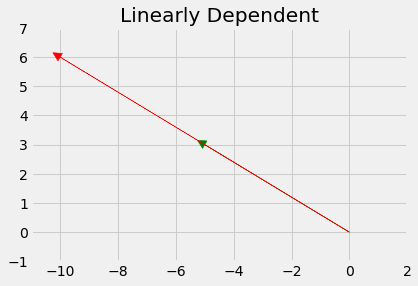

In [132]:
a = np.array([-5, 3])
b = np.array([-10, 6])


plt.arrow(0,0,a[0], a[1], head_width=.3, head_length=0.3, color = 'g')
plt.arrow(0,0,b[0], b[1], head_width=.3, head_length=0.3, color = 'r')

plt.xlim(-11,2)
plt.ylim(-1,7)
plt.grid(True)
plt.title('Linearly Dependent')
plt.show()

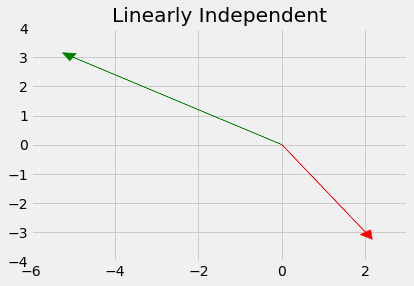

In [131]:
a = np.array([-5, 3])
b = np.array([2, -3])

plt.style.use('fivethirtyeight')
plt.arrow(0,0,a[0], a[1], head_width=.3, head_length=0.3, color = 'g')
plt.arrow(0,0,b[0], b[1], head_width=.3, head_length=0.3, color = 'r')

plt.xlim(-6,3)
plt.ylim(-4,4)
plt.grid(True)
plt.title('Linearly Independent')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [ ]:
# Since they are linearly dependent, can only span one dimensional space

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [135]:
X = np.mat([[1, 2, 3],
           [-1, 0, 7],
            [4, 8, 2]])
X_rank = np.linalg.matrix_rank(X)
X_rank


# Since all the vectors are linearly independent, it could span around the three dimensional spoace 

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



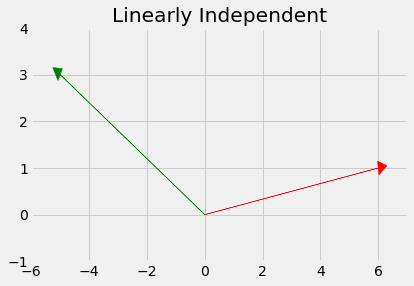

In [138]:
a = np.array([-5, 3])
b = np.array([6, 1])

plt.style.use('fivethirtyeight')
plt.arrow(0,0,a[0], a[1], head_width=.3, head_length=0.3, color = 'g')
plt.arrow(0,0,b[0], b[1], head_width=.3, head_length=0.3, color = 'r')

plt.xlim(-6,7)
plt.ylim(-1,4)
plt.grid(True)
plt.title('Linearly Independent')
plt.show()

## 6.2 What does it mean to form a basis?

It means they are not redundant. They are linearly independent.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [136]:
P = np.mat([[1, 2, 3],
           [-1, 0, 7],
            [4, 8, 2]])
P_rank = np.linalg.matrix_rank(P)
P_rank

3

## 7.2 What does the rank of a matrix tell us?

It tells how many dimansions of matrix we get in the output. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

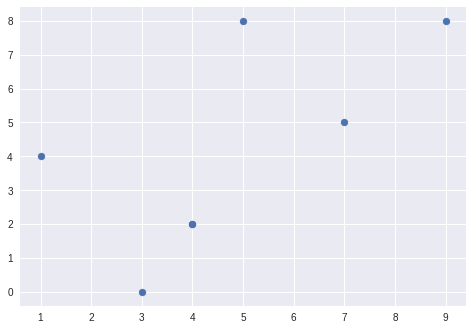

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

In [142]:
x_values = np.array([1, 4, 7, 3, 9, 4, 5])
y_values = np.array([4, 2, 5, 0, 8, 2, 8])

v=np.array([1,1]) # x=y

w= np.array([1,4])

numerator_w_dot_v = np.dot(w,v)
denominator_v_dot_v = np.dot(v,v)

proj = np.multiply((numerator_w_dot_v / denominator_v_dot_v), v)
proj

array([2.5, 2.5])

In [156]:
def project_vector_on_line(array1, array2):

  for x, y in zip(array1, array2):

    w= np.array([x,y])
  # Since the equation of the line is x=y
    v=np.array([1,1]) 

    numerator_w_dot_v = np.dot(w,v)
    denominator_v_dot_v = np.dot(v,v)
  # Formula for projection of w on line L proj = (w.v / v.v)v

    proj = np.multiply((numerator_w_dot_v / denominator_v_dot_v), v)
  

[2.5 2.5]
[3. 3.]
[6. 6.]
[1.5 1.5]
[8.5 8.5]
[3. 3.]
[6.5 6.5]


IndexError: ignored

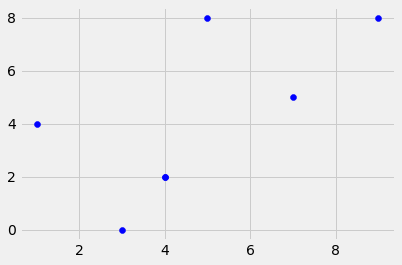

In [169]:
plt.scatter(x_values, y_values, color='blue')
for i in (proj):

  plt.scatter(i[0], i[1], color='red')

plt.show()

In [161]:
def project_vector_on_line(array1, array2):

  for x, y in zip(array1, array2):

    w= np.array([x,y])
  # Since the equation of the line is x=y
    v=np.array([1,1]) 

    numerator_w_dot_v = np.dot(w,v)
    denominator_v_dot_v = np.dot(v,v)
  # Formula for projection of w on line L proj = (w.v / v.v)v

    proj = np.multiply((numerator_w_dot_v / denominator_v_dot_v), v)
    print(proj[0], proj[1])
project_vector_on_line(x_values, y_values)   

2.5 2.5
3.0 3.0
6.0 6.0
1.5 1.5
8.5 8.5
3.0 3.0
6.5 6.5
